In [24]:
import pandas as pd
cpi = pd.read_csv("data/cpi.csv", header=0).dropna()
exchange_rate = pd.read_csv("data/exchange_rate.csv", header=0).dropna()
cpi_mean = cpi.groupby('half_year').mean()

In [25]:
print(cpi)

    half_year                  level_1    value
0     1993-H1   All Items - Lowest 20%   62.594
1     1993-H1   All Items - Middle 60%   67.942
2     1993-H1  All Items - Highest 20%   72.359
3     1993-H2   All Items - Lowest 20%   63.016
4     1993-H2   All Items - Middle 60%   68.445
..        ...                      ...      ...
157   2019-H1   All Items - Middle 60%  100.408
158   2019-H1  All Items - Highest 20%  100.679
159   2019-H2   All Items - Lowest 20%   98.350
160   2019-H2   All Items - Middle 60%  100.672
161   2019-H2  All Items - Highest 20%  100.927

[162 rows x 3 columns]


In [26]:
cpi_mean = cpi.groupby('half_year').mean()
cpi_mean

,value
half_year,
1993-H1,67.631667
1993-H2,68.649667
1994-H1,70.069667
1994-H2,71.511667
1995-H1,71.732000
1995-H2,72.036667
1996-H1,72.520000
1996-H2,73.059000
1997-H1,73.891000


In [27]:
exchange_rate.head(2)

,date,value
0,02/01/91,1.7495
1,03/01/91,1.7370


In [28]:
import pandas as pd
cpi = pd.read_csv("data/cpi.csv", header=0).dropna()
exchange_rate = pd.read_csv("data/exchange_rate.csv", header=0).dropna()
cpi_mean = cpi.groupby('half_year').mean()

def discard_date(string):
    splits = string.split('/')
    year = splits[2]
    month = splits[1]
    half_year = 'H1'
    
    if(int(year) <= 20):
        year = '20' + str(year)
    else:
        year = '19' + str(year)
    
    if(int(month) > 6):
        half_year = 'H2'
    
    return year + '-' + half_year

exchange_rate['date'] = exchange_rate['date'].apply(discard_date)
exchange_rate = exchange_rate.groupby('date').mean()

exchange_rate.index.names = ["half_year"]
exchange_rate = exchange_rate.rename(columns={'value':'exchange_rate'})
cpi_mean = cpi_mean.rename(columns={'value':'CPI'})


print(exchange_rate, cpi_mean)

           exchange_rate
half_year               
1991-H1         1.754376
1991-H2         1.697900
1992-H1         1.640049
1992-H2         1.615250
1993-H1         1.630887
1993-H2         1.597829
1994-H1         1.567529
1994-H2         1.485443
1995-H1         1.418135
1995-H2         1.414817
1996-H1         1.410565
1996-H2         1.408057
1997-H1         1.427177
1997-H2         1.541633
1998-H1         1.656031
1998-H2         1.684598
1999-H1         1.707627
1999-H2         1.680994
2000-H1         1.709971
2000-H2         1.738769
2001-H1         1.782770
2001-H2         1.801181
2002-H1         1.817832
2002-H2         1.762500
2003-H1         1.746404
2003-H2         1.736794
2004-H1         1.698353
2004-H2         1.680791
2005-H1         1.646894
2005-H2         1.680825
2006-H1         1.607322
2006-H2         1.569253
2007-H1         1.528190
2007-H2         1.484900
2008-H1         1.386207
2008-H2         1.441219
2009-H1         1.491980
2009-H2         1.415859


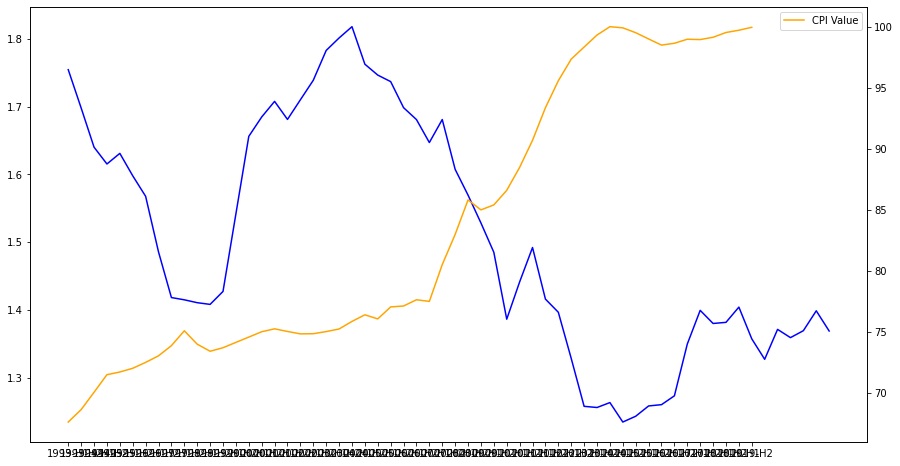

In [29]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(15,8))
ax.plot(exchange_rate['exchange_rate'], color='blue', label='Exchange Rate')

ax2 = ax.twinx()
ax2.plot(cpi_mean['CPI'], color='orange', label='CPI Value')

plt.legend()
plt.show()

In [30]:
merged = pd.merge(exchange_rate, cpi_mean, on='half_year')
merged.corr()

,exchange_rate,CPI
exchange_rate,1.000000,-0.756073
CPI,-0.756073,1.000000


In [31]:
merged

,exchange_rate,CPI
half_year,,
1993-H1,1.630887,67.631667
1993-H2,1.597829,68.649667
1994-H1,1.567529,70.069667
1994-H2,1.485443,71.511667
1995-H1,1.418135,71.732000
1995-H2,1.414817,72.036667
1996-H1,1.410565,72.520000
1996-H2,1.408057,73.059000
1997-H1,1.427177,73.891000


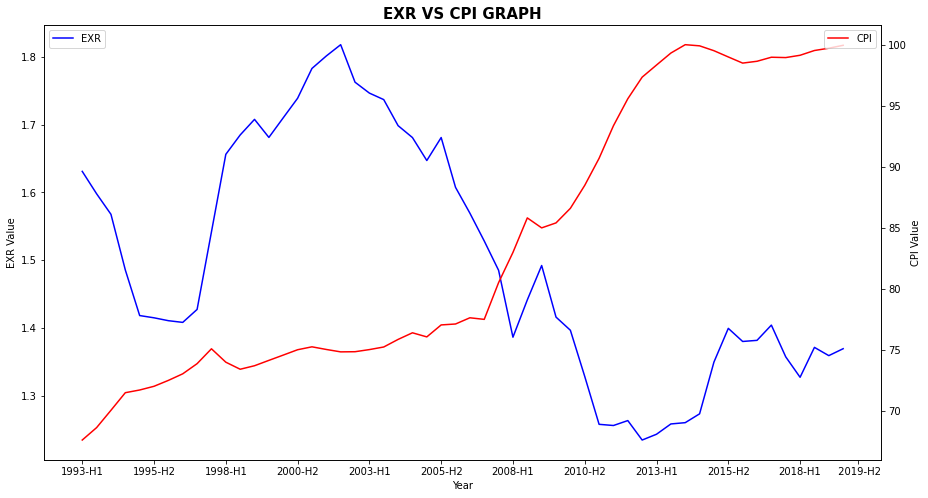

In [32]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(15,8))
EXR_plot = ax.plot(merged['exchange_rate'], color='blue', label='EXR')
plt.legend(loc='upper left')

ax2 = ax.twinx()
ax2.plot(cpi_mean['CPI'], color='red', label='CPI')   
plt.legend(loc='upper right')

ax.set(xlabel='Year', ylabel='EXR Value')
ax2.set(ylabel='CPI Value')
plt.title('EXR VS CPI GRAPH', fontdict={'fontweight':'bold','fontsize':15})
plt.xticks(merged.index[::5].tolist()+[' 2019-H2'])  #x-axis
plt.show()

#to download graph into png used
###plt.savefig('EXR Graph.png', dpi=100)

In [33]:
inflation = pd.read_excel("data/infl_interest.xlsx", header=0).dropna()
gdp=pd.read_csv("data/gdp.csv").dropna()

ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 1.0.0 for Excel support Use pip or conda to install xlrd.

In [34]:
gdp

,GDP
half_year,
1976-H1,7.80
1976-H2,7.10
1977-H1,6.90
1977-H2,6.80
1978-H1,5.90
...,...
2018-H1,4.85
2018-H2,2.05
2019-H1,0.60


In [35]:
gdp_quarter = gdp.groupby('quarter').mean()
gdp_quarter

KeyError: 'quarter'

In [36]:
gdp=pd.read_csv("data/gdp.csv").dropna()
gdp_quarter = gdp.groupby('quarter').mean()

def discard_date1(string):
    splits = string.split('-')
    year = splits[0]
    quartil = splits[1]
    half_year = 'H1'
    
    if(str(quartil) == 'Q3' or str(quartil) == 'Q4'):
        half_year = 'H2'
    
    return year + '-' + half_year

gdp['quarter'] = gdp['quarter'].apply(discard_date1)
gdp = gdp.groupby('quarter').mean()

gdp.index.names = ["half_year"]
gdp = gdp.rename(columns={'value':'GDP'})
gdp

,GDP
half_year,
1976-H1,7.80
1976-H2,7.10
1977-H1,6.90
1977-H2,6.80
1978-H1,5.90
...,...
2018-H1,4.85
2018-H2,2.05
2019-H1,0.60


In [37]:
exchange_rate

,exchange_rate
half_year,
1991-H1,1.754376
1991-H2,1.697900
1992-H1,1.640049
1992-H2,1.615250
1993-H1,1.630887
1993-H2,1.597829
1994-H1,1.567529
1994-H2,1.485443
1995-H1,1.418135


In [38]:
EXR_GDP = pd.merge(exchange_rate, gdp, on='half_year')
EXR_GDP.head()

,exchange_rate,GDP
half_year,,
1991-H1,1.754376,6.45
1991-H2,1.697900,6.90
1992-H1,1.640049,5.55
1992-H2,1.615250,7.70
1993-H1,1.630887,10.65


In [39]:
EXR_GDP.corr()

,exchange_rate,GDP
exchange_rate,1.000000,0.054232
GDP,0.054232,1.000000


<AxesSubplot:>

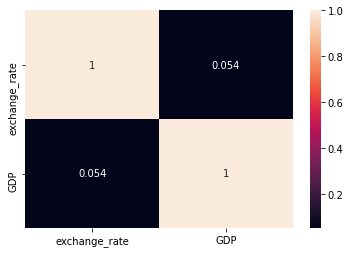

In [40]:
import seaborn as sns
sns.heatmap(EXR_GDP.corr(), annot=True)

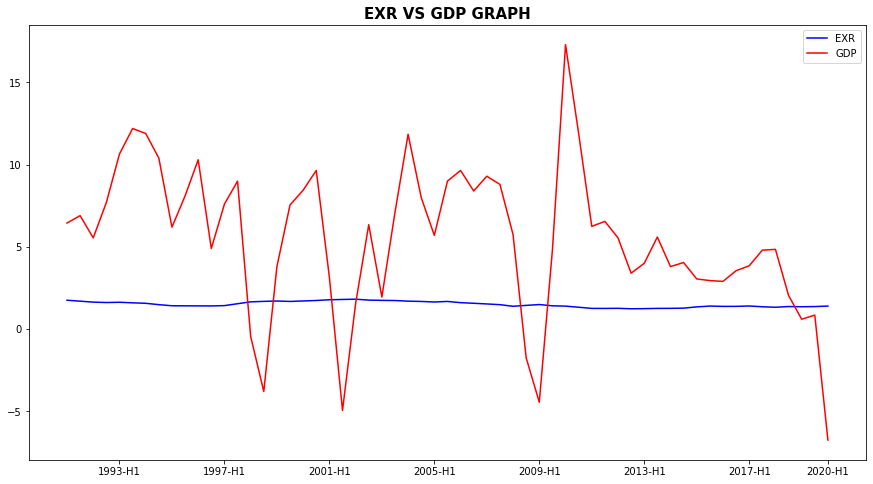

In [41]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(15,8))

plt.plot(EXR_GDP['exchange_rate'], color='blue', label='EXR')
plt.plot(EXR_GDP['GDP'], color='red', label='GDP')   
plt.legend(loc='upper right')

plt.title('EXR VS GDP GRAPH', fontdict={'fontweight':'bold','fontsize':15})
plt.xticks(merged.index[::8].tolist()+['2020-H1'])  #x-axis
plt.show()

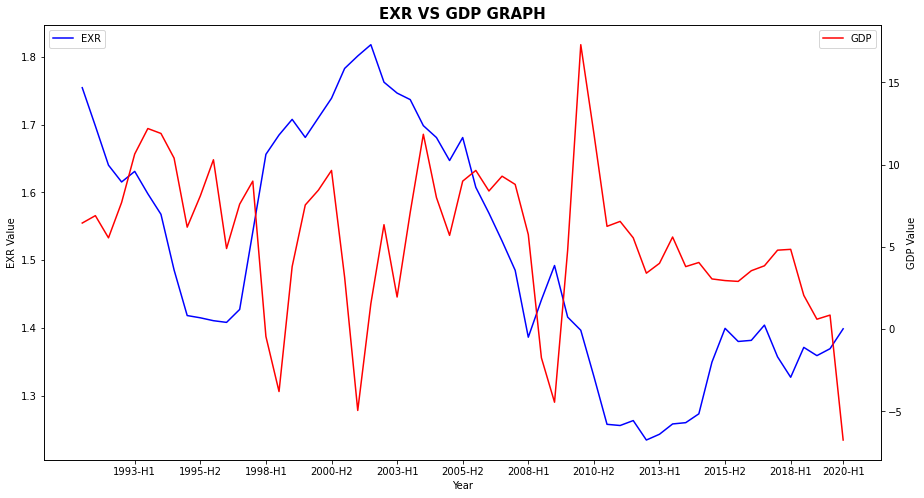

In [42]:
fig,ax = plt.subplots(figsize=(15,8))
EXR_plot = ax.plot(EXR_GDP['exchange_rate'], color='blue', label='EXR')
plt.legend(loc='upper left')

ax4 = ax.twinx()
ax4.plot(EXR_GDP['GDP'], color='red', label='GDP')   
plt.legend(loc='upper right')

ax.set(xlabel='Year', ylabel='EXR Value')
ax4.set(ylabel='GDP Value')
plt.title('EXR VS GDP GRAPH', fontdict={'fontweight':'bold','fontsize':15})
plt.xticks(merged.index[::5].tolist()+['2020-H1'])  #x-axis
plt.show()

# more

In [43]:
inflation_cp = pd.read_excel("data/infl_interest.xlsx", header=0).dropna()
inflation_cp

ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 1.0.0 for Excel support Use pip or conda to install xlrd.

In [44]:
inflation_cp = inflation_cp.drop(['Country Name','Series Code','Series Name','Country Code','2020 [YR2020]'], axis=1)
inflation_cp = inflation_cp.drop([1,2,3,4,5,7,8,9,10,11])

inflation_cp

NameError: name 'inflation_cp' is not defined

In [45]:
inflation_cp = inflation_cp.transpose()
inflation_cp.index.names = ['Year']
inflation_cp = inflation_cp.rename(columns={int(0):str('SGP')})
inflation_cp = inflation_cp.rename(columns={int(6):str('USA')})
inflation_cp.head()

NameError: name 'inflation_cp' is not defined

In [46]:
def discard_year(string):
    splits = string.split(' ')
    year = splits[0]
    YR = splits[1]
    
    if(str(YR) == str([year])): print(year)
    return year

inflation_cp.index = inflation_cp.index.map(discard_year)
inflation_cp

NameError: name 'inflation_cp' is not defined

In [47]:
inflation_cp.tail()

NameError: name 'inflation_cp' is not defined

NameError: name 'inflation_cp' is not defined

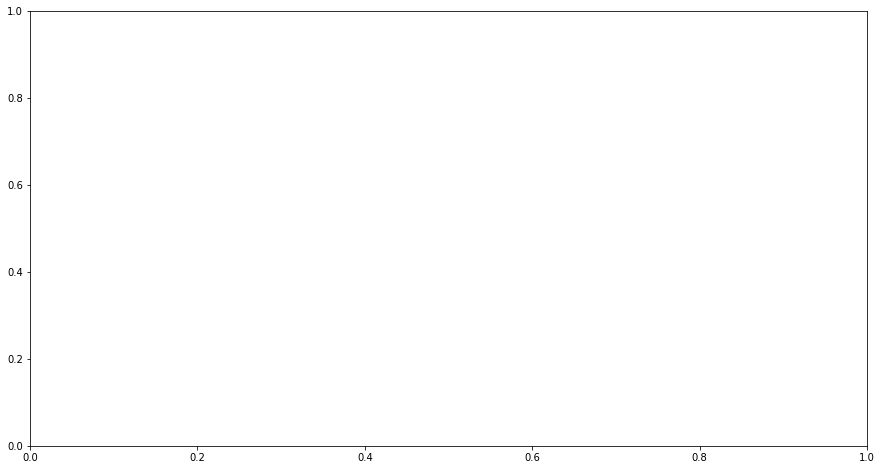

In [48]:
#The graph show the USA and SGP Inflation, Consumer Prices (annual %) from 1971 to 2019.
fig,ax = plt.subplots(figsize=(15,8))
plt.plot(inflation_cp['SGP'], color='blue', label='SGP Inflation,Consumer Prices')
plt.plot(inflation_cp['USA'], color='red', label='USA Inflation,Consumer Prices')   
plt.legend(loc='upper right')

plt.grid(color='g', linestyle='-', linewidth=0.3)

plt.xlabel('Year',fontdict={'fontweight':'bold'}) 
plt.ylabel('Inflation, Consumer Prices (annual %)', fontdict={'fontweight':'bold'})
plt.title('USA and SGP Inflation, Consumer Prices (annual %)', fontdict={'fontweight':'bold','fontsize':15})
plt.xticks(inflation_cp.index, rotation =90)
plt.show()

In [ ]:
 exchange_rate.tail()

In [49]:
def discard_date2(string):
    splits = string.split('-')
    year = splits[0]
    half_years = splits[1]
    
    return year 

exchange_rate.index = exchange_rate.index.map(discard_date2)
exchange_rate = exchange_rate.groupby('half_year').mean()
exchange_rate

,exchange_rate
half_year,
1991,1.726138
1992,1.627650
1993,1.614358
1994,1.526486
1995,1.416476
1996,1.409311
1997,1.484405
1998,1.670315
1999,1.694311


In [ ]:
###denote f(x) is distribution for exchange rate  
##g(x) is distribution for gdp  so g'(x) denote gdp growth corr(f(x), g(x)) is different from corr(f(x), g'(x))


In [ ]:
fig,ax = plt.subplots(figsize=(15,8))
EXR_plot = ax.plot(merged['exchange_rate'], color='blue', label='EXR')
plt.legend(loc='upper left')

ax2 = ax.twinx()
ax2.plot(cpi_mean['CPI'], color='red', label='CPI')   
plt.legend(loc='upper right')

ax.set(xlabel='Year', ylabel='EXR Value')
ax2.set(ylabel='CPI Value')
plt.title('EXR VS CPI GRAPH', fontdict={'fontweight':'bold','fontsize':15})
plt.xticks(merged.index[::5].tolist()+[' 2019-H2'])  #x-axis
plt.show()